# Excercise - Creating our own custom Model

This is a notebook that provides a quick overview of how to create your own custom model. You will be creating a simple model.
You will be utilizing Keras and Tensorflow


In [13]:
# Imports
import kagglehub
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Ftrl, SGD, Adagrad, AdamW
from tensorflow.keras.regularizers import l2, l1_l2, l1
from tensorflow.keras.models import Model
from sklearn.metrics import classification_report, f1_score, recall_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# 1. Load the data
path = kagglehub.dataset_download("uom190346a/water-quality-and-potability")
df = pd.read_csv(f"{path}/water_potability.csv")

Plot the Data Appropriately

In [ ]:
# 2. Handle missing values with (mean imputation)
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [ ]:
# 3. Split features and target
X = df_imputed.drop("Potability", axis=1)
y = df_imputed["Potability"]

In [ ]:
# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=72)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Each Memeber Defines their model Here

In [ ]:
def model_christophe():
    model = Sequential([
        Dense(128, input_shape=(9,), activation='relu', kernel_regularizer=l2(0.005)),
        Dropout(0.3),
        Dense(64, activation='relu', kernel_regularizer=l2(0.005)),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer=RMSprop(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model


# Start the training Process

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Train: 0.692, Test: 0.691


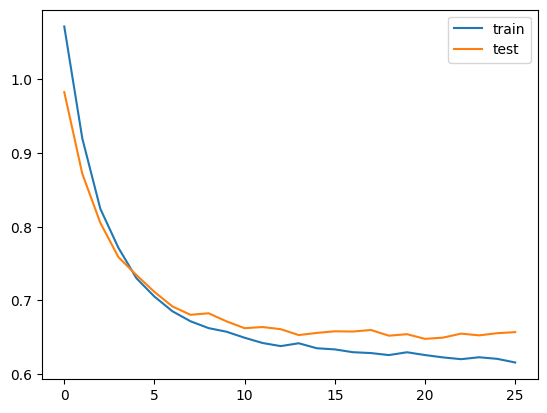

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Accuracy: 0.6905
F1 Score: 0.5246
Precision: 0.6550
Recall: 0.4375


In [ ]:
# Scale the data first
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Callbacks
es = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Train your model
model = model_christophe()
history = model.fit(
    X_train_scaled, y_train,
    epochs=4000,
    batch_size=32,
    validation_split=0.2,
    callbacks=[es],
    verbose=0
)

# Evaluation
_, train_acc = model.evaluate(X_train_scaled, y_train, verbose=0)
_, test_acc = model.evaluate(X_test_scaled, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# Plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

# Prediction and metrics
y_pred_nn = model.predict(X_test_scaled)
y_pred_classes = (y_pred_nn > 0.5).astype(int)

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)

print(f"Accuracy: {acc:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
